In [19]:
import reproject
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.visualization.wcsaxes.frame import EllipticalFrame
import numpy as np
from astropy.time import Time
from astropy.coordinates import AltAz, EarthLocation, FK5
import astropy.units as u

In [20]:
from astropy.io import fits

In [85]:
obstime = Time("2020-07-10T15:00")

In [86]:
dwl = EarthLocation(lat="52d48m43.27", lon="6d23m46.21", height="25m")

In [87]:
zenith = AltAz(alt=90*u.deg, az=0*u.deg, location=dwl, obstime=obstime).transform_to(FK5)

In [100]:
n_pixels = 3151

In [103]:
wcs_zea = WCS()
wcs_zea.wcs.crpix = [n_pixels//2+1, n_pixels//2+1]
wcs_zea.wcs.crval = [zenith.ra.deg, zenith.dec.deg]
wcs_zea.wcs.ctype = ["RA---ZEA", "DEC--ZEA"]
wcs_zea.wcs.cdelt = [-0.05427333333333333, 0.05427333333333333]
wcs_zea.wcs.cdelt = [-90./n_pixels*2, 90./n_pixels*2]

In [106]:
from reproject import reproject_from_healpix
import warnings

In [107]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    data_reprojected, footprint = reproject_from_healpix("GASS_EBHIS_1_1024.fits", wcs_zea, shape_out=(3151,3151))

In [108]:
# Arguments shared by imshow and imsave
im_kwargs = {'cmap': 'afmhot',
             'vmin': np.percentile(data_reprojected[~np.isnan(data_reprojected)], 30),
             'vmax': np.percentile(data_reprojected[~np.isnan(data_reprojected)], 99.7),
             'origin': 'lower'}

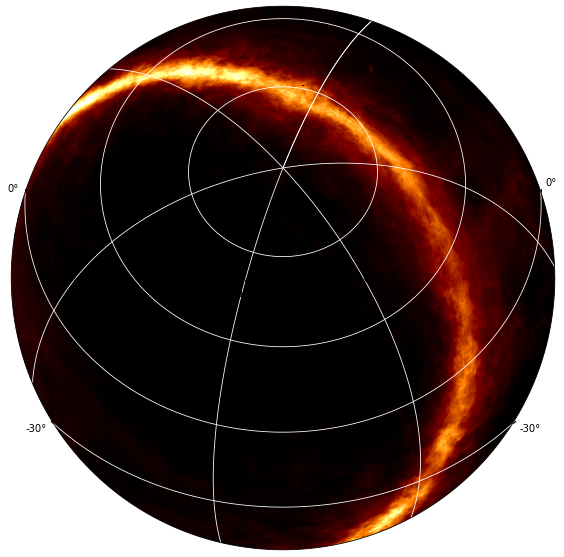

In [111]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection=wcs_zea, frame_class=EllipticalFrame)
ax.imshow(data_reprojected, **im_kwargs);
ax.grid(color='white')

In [112]:
plt.imsave("hi4pi.png", data_reprojected, **im_kwargs)